<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 4

### Problem 0 (3 points)

## Group Members: Beck Addison, Shivam Kaul, Gin Wang

## Part 1: The Soft-Max

### Problem 1.1 (Exam Style)

Constraints:
$$p_1+p_2+p_3=1$$
$$p_1, p_2,p_3 >0$$

The equation represents a line that can be given as a function of $p_3$ (for example): $p_3 = 1 - p_1 - p_2$. The inequality constraints represent a volume extending infinitely across the positive $p_1$, $p_2$, and $p_3$ axes, and can be thought of as an infinitely large cube with a single vertex at the origin and sides along the positive axes.

The equations is therfore constrained by the vertices $(0,0,1),(0,1,0),(1,0,0)$, meaning that the possible solutions for this equaiton are all within a triangular surface with those vertices (as there are three unique vertices of the polygon). This surface is the intersection of the plane $p_3 = 1 - p_1 - p_2$ and the space given by $p_1, p_2,p_3 >0$.


### Problem 1.2 (Exam Style)

There are seven unique coordinates that split the region in 1.1 into the three distinct 4-sided subregions for each of the choices $\{1,2,3\}$. 

The coordinates are:

1. $(0, 0, 1)$

2. $(0, 1, 0)$

3. $(1, 0, 0)$

4. $(0, \frac{1}{2}, \frac{1}{2})$

5. $(\frac{1}{2}, 0, \frac{1}{2})$

6. $(\frac{1}{2}, \frac{1}{2}, 0)$

7. $(\frac{1}{3}, \frac{1}{3}, \frac{1}{3})$


The regions are bounded by the following vertices:

1. Region 1

    a. $(0, 1, 0)$

    b. $(0, \frac{1}{2}, \frac{1}{2})$ (shared with region 2)

    c. $(\frac{1}{2}, \frac{1}{2}, 0)$ (shared with region 3)

2. Region 2

    a. $(0, 0, 1)$

    b. $(0, \frac{1}{2}, \frac{1}{2})$ (shared with region 1)

    c. $(\frac{1}{2}, \frac{1}{2}, 0)$ (shared with region 3)

3. Region 3

    a. $(1, 0, 0)$

    b. $(\frac{1}{2}, \frac{1}{2}, 0)$ (shared with region 1)

    c. $(\frac{1}{2}, 0, \frac{1}{2})$ (shared with region 2)

All three regions have a common intersection at $(\frac{1}{3}, \frac{1}{3}, \frac{1}{3})$.


## Part 2: Loss and Soft-Max 

### Problem 2.1 (Exam Style)

Consider the case where $y=0$:

$$l_q(0,\textbf{p}) = \frac{1}{2}\Vert(1,0)-(p_0, p_1)\Vert^2$$

$$= \frac{(1-p_0)^2+(-p_1)^2}{2}$$

$$= \frac{p_1^2+p_1^2}{2}$$

$$= p_1^2 = (1-p_0)^2 = (1-p_y)^2$$

When $y=1$:

$$l_q(1,\textbf{p}) = \frac{1}{2}\Vert(0,1)-(p_0, p_1)\Vert^2$$

$$= \frac{(-p_0)^2+(1-p_1)^2}{2}$$

$$= \frac{p_0^2+p_0^2}{2}$$

$$= p_0^2 = (1-p_1)^2 = (1-p_y)^2$$

### Problem 2.2 (Exam Style)

$$d=z_0-z_1$$

$$z_0=d+z_1$$

$$p_1 = \frac{e^{z_1}}{e^{z_0}+e^{z_1}}$$

$$p_1 = \frac{e^{z_1}}{e^{z_1+d}+e^{z_1}}$$

$$p_1 = \frac{e^{z_1}}{e^{z_1}(1+e^{d})}$$

$$p_1 = \frac{1}{1+e^{d}},  p_0 = 1-\frac{1}{1+e^{d}}$$

### Problem 2.3

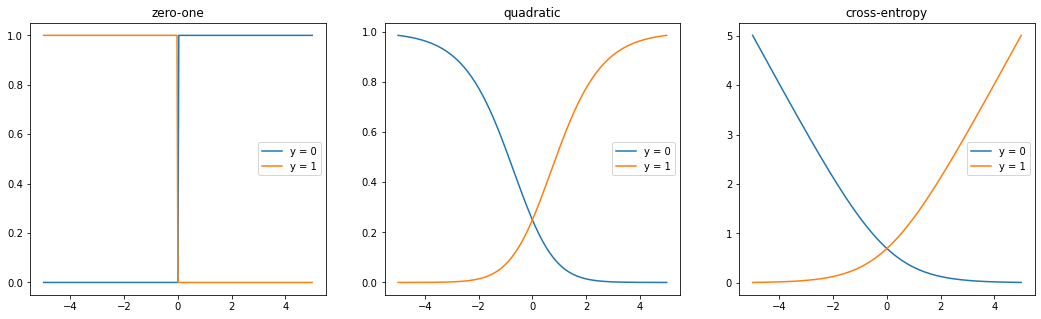

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def softMax(d):
    return [1-1/(1+np.exp(d)), 1/(1+np.exp(d))]

def zeroOne(y,p):
    if p[y] > p[1-y]:
        return 1
    else:
        return 0
    
def quadratic(y,p):
    return (1-p[y])**2

def crossEntropy(y,p):
    return -np.log(p[y])

d = np.linspace(-5., 5., 301)
y = [0,1]
loss = [zeroOne, quadratic, crossEntropy]
title = ['zero-one', 'quadratic', 'cross-entropy']

plt.figure(figsize=(18, 5))
for j, l in enumerate (loss):
    plt.subplot(1, 3, j+1)
    plt.title(title[j])
    for yy in y:
        plt.plot(d, [l(yy, softMax(i)) for i in d], label = 'y = '+str(yy))
        #label axes
        plt.legend()


plt.show()




### Problem 2.4 (Exam Style)

From the graphs above, we can see that the cross-entropy graph is convex. 

Convexity of the composition of soft-max and loss is not very helpful to training a neural network because the soft-max isn't relevant in optimizing for the highest activation (as the exponential is always - monotonically - increasing) and because in general a constantly decreasing loss (which is the goal of training) represents an immobile gradient (i.e. the gradient is zero), meaning that optimizing at some minimum doesn't do anything to increase or improve the training of the model.

## Part 3: Back-Propagation 

### Problem 3.1 (Exam Style)

Inputs $x_1$ and $x_2$, with the values as follows:
$$x_1 = 1$$
$$x_2 = 1$$

The activations $a_1$ and $a_2$ in the first layer of the network are obtained:
$$a_1 = 2 - 1 + 0 = 1$$
$$a_2 = 1 + 0 - 2 = -1$$

The outputs $y_1$ and $y_2$ at the first layer using the non-linearity ReLU function:
$$y_1 = ReLU(a_1) = 1$$
$$a_2 = ReLU(a_2) = 0$$

The activation $a_3$ and the corresponding output $y_{hat}$ at the second layer is computed to be:
$$a_3 = 1 +0 +0 = 1$$
$$y_{hat} = ReLU(a_3) = 1$$

**Therefore**,
$$y_{hat} = 1$$

### Problem 3.2 (Exam Style)

Let the vector of weights be given as the following:

$$W = [w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8, w_9]$$<br>

The general equations for the activations and the outputs at each layer of the given network are mentioned below:

$$a_1 = x_1w_1 + x_2w_2 + w_3$$

$$y_1 = ReLU(a_1)$$

$$a_2 = x_1w_4 + x_2w_5 + w_6$$

$$y_2 = ReLU(a_2)$$

$$a_3 = y_1w_7 + y_2w_8 + w_9$$

$$y_{hat} = ReLU(a_3)$$<br>

Note:
$$\frac{dReLU(x)}{dx} = 0,  x<0$$<br>
$$\frac{dReLU(x)}{dx} = 1,  x>0$$

We assume that for this purpose of calculating gradients, $x$ > 0<br>
<br>

The gradients of the output $y_{hat}$ with respect to the weights is calculated as below (moving backwards and using chain-rule):

$$\frac{dy_{hat}}{dw_9} = \frac{dy_{hat}}{da_3}.\frac{da_3}{dw_9} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + y_2w_8 + w_9)}{dw_9} = 1 $$<br>

$$\frac{dy_{hat}}{dw_8} = \frac{dy_{hat}}{da_3}.\frac{da_3}{dw_8} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + y_2w_8 + w_9)}{dw_8} = y_2 $$<br>

$$\frac{dy_{hat}}{dw_7} = \frac{dy_{hat}}{da_3}.\frac{da_3}{dw_7} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + y_2w_8 + w_9)}{dw_7} = y_1 $$<br>

$$\frac{dy_{hat}}{dw_6} = \frac{dy_{hat}}{da_3}.\frac{da_3}{da_2}.\frac{da_2}{dw_6} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + ReLU(a_2)w_8 + w_9)}{da_2}.\frac{d(x_1w_4 + x_2w_5 + w_6)}{dw_6} = w_8 $$<br>

$$\frac{dy_{hat}}{dw_5} = \frac{dy_{hat}}{da_3}.\frac{da_3}{da_2}.\frac{da_2}{dw_5} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + ReLU(a_2)w_8 + w_9)}{da_2}.\frac{d(x_1w_4 + x_2w_5 + w_6)}{dw_5} = w_8x_2 $$<br>

$$\frac{dy_{hat}}{dw_4} = \frac{dy_{hat}}{da_3}.\frac{da_3}{da_2}.\frac{da_2}{dw_4} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + ReLU(a_2)w_8 + w_9)}{da_2}.\frac{d(x_1w_4 + x_2w_5 + w_6)}{dw_4} = w_8x_1 $$<br>

$$\frac{dy_{hat}}{dw_3} = \frac{dy_{hat}}{da_3}.\frac{da_3}{da_1}.\frac{da_1}{dw_3} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + ReLU(a_2)w_8 + w_9)}{da_1}.\frac{d(x_1w_1 + x_2w_2 + w_3)}{dw_3} = w_7 $$<br>

$$\frac{dy_{hat}}{dw_2} = \frac{dy_{hat}}{da_3}.\frac{da_3}{da_1}.\frac{da_1}{dw_2} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + ReLU(a_2)w_8 + w_9)}{da_1}.\frac{d(x_1w_1 + x_2w_2 + w_3)}{dw_2} = w_7x_2 $$<br>

$$\frac{dy_{hat}}{dw_1} = \frac{dy_{hat}}{da_3}.\frac{da_3}{da_1}.\frac{da_1}{dw_1} = \frac{dReLU(a_3)}{da_3}.\frac{d(y_1w_7 + ReLU(a_2)w_8 + w_9)}{da_1}.\frac{d(x_1w_1 + x_2w_2 + w_3)}{dw_1} = w_7x_1 $$<br>

**Therefore**,

The vector of gradients of $y_{hat}$ with respect to the weights is given as:

$$[w_7x_1,w_7x_2,w_7,w_8x_1,w_8x_2,w_8,y_1,y_2,1]$$

## Part 4: Experiments with a Small Neural Network

In [2]:
import urllib.request
import pickle
from os import path as osp


pickle_file_name = 'data.pkl'
if not osp.exists(pickle_file_name):
    url = 'https://www2.cs.duke.edu/courses/spring21/compsci527/homework/4/data.pkl'
    urllib.request.urlretrieve(url, pickle_file_name)
with open(pickle_file_name, 'rb') as file:
    data_sets = pickle.load(file)

In [3]:
import numpy as np


def make_data_space(data):
    x = np.vstack([data[data_set]['x'] for data_set in data])
    tx = data['test']['x']
    space = {'left': np.min(x[:, 0]), 'right': np.max(x[:, 0]),
             'bottom': np.min(x[:, 1]), 'top': np.max(x[:, 1]),
             'pitch': tx[1, 1] - tx[0, 1]}
    return space


def make_patches(centers, color, side):
    shift = -side / 2.
    patches = [Rectangle(center + shift, side, side) for center in centers]
    return PatchCollection(patches, fc=color, lw=0.)

In [4]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
%matplotlib inline


def plot_data(data, space, title):
    data_left, data_right = space['left'], space['right']
    data_bottom, data_top = space['bottom'], space['top']
    pitch = space['pitch']
    half_pitch = pitch / 2.
    left, right = data_left - half_pitch, data_right + half_pitch
    bottom, top = data_bottom - half_pitch, data_top + half_pitch
    aspect_ratio = (top - bottom) / (right - left)
    width, title_height = 6., 0.25
    axes_height = width * aspect_ratio
    figure_height = axes_height + title_height
    side = 0.75 * pitch
    x, y = data['x'], data['y']
    plt.figure(figsize=(width, figure_height))
    ax = plt.gca()
    axes_height_fraction = axes_height / figure_height
    ax.set_position((0., 0., 1., axes_height_fraction))
    ax.set_xlim(left, right)
    ax.set_ylim(bottom, top)
    positive = make_patches(x[y, :], 'g', side)
    negative = make_patches(x[~y, :], 'r', side)
    ax.add_collection(positive)
    ax.add_collection(negative)
    plt.axis('off')
    plt.title(title, fontsize=24)
    plt.show()
    plt.close()

In [5]:
from sklearn.neural_network import MLPClassifier as Network
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning


@ignore_warnings(category=ConvergenceWarning)
def train_network(hidden_layer_sizes, options, data):
    net = Network(hidden_layer_sizes=hidden_layer_sizes,
                  solver='sgd',
                  batch_size=options['mini batch size'],
                  learning_rate=options['learning rate schedule'],
                  learning_rate_init=options['initial learning rate'],
                  power_t=options['learning rate exponent'],
                  max_iter=options['max epochs'],
                  momentum=options['momentum'],
                  validation_fraction=0.,
                  n_iter_no_change=options['max epochs'],
                  alpha=0.,
                  tol=0.,
                  verbose=options['verbose']
                  )
    net.fit(data['x'], data['y'])
    risk = net.loss_curve_

    return net, risk

In [6]:
def experiment(architecture, training_options, data, runs=1, plot_predictions=None):
    if plot_predictions is None:
        plot_predictions = runs == 1

    accuracy, accuracies, risk_plots = 0., [], []
    print('Run', end=' ')
    for run in range(runs):
        print(run, end=' ')
        nn, risk_plot = train_network(architecture, training_options, data['train'])
        y_hat = nn.predict(data['test']['x'])
        accuracy = nn.score(data['test']['x'], data['test']['y'])
        accuracies.append(accuracy)
        risk_plots.append(risk_plot)
        if plot_predictions:
            predictions = {'x': data['test']['x'], 'y': y_hat}
            plot_data(predictions, data_space,
                      title='run {}, accuracy {:.2f} percent'.format(run, accuracy * 100.))
    print()

    plt.figure()
    for run, plot in enumerate(risk_plots):
        plt.plot(plot, label='run {}'.format(run))
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('training risk')
    plt.show()
    plt.close()

    if runs == 1:
        qualifier = ''
    else:
        accuracy = np.median(accuracies)
        qualifier = 'median '
    print('{}accuracy {:.2f} percent'.format(qualifier, accuracy * 100.))

### Problem 4.1 (Exam Style)

In [7]:
data_space = make_data_space(data_sets)

In [8]:
label_set = data_sets['test'][ 'y']
filter_arr = label_set == False 
false_ct = np.shape(label_set[filter_arr])[0]
false_ct/np.shape(label_set)[0]

0.8668

Since the proportion of false labels is about 0.87 regardless of the value of the test input, a random selection from the label set will produce a false result with probability 0.87 on average, meaning we can just pick from a list of options with $p(False) = 0.8668 = 1 - p(True)$. Regardless of $x$, then, we can get a result out that is likely to be predictive of some value $x$ with $>85\%$ likelihood.

In [10]:
def predict(x):
    options = [True, False] 
    choice = np.random.choice(options, 1, p = [1 - 0.8668, 0.8668])
    return choice 


In the above method, we can see that `x` has no bearing on the output of the function to produce a `False` result with probability 0.8668. The method simply pulls at random from the output space with the weighted probability educated by the proportion of `False` results in the output space `Y`. Therefore, our function is over 85% accurate, because it will produce a False answer with the same probability that the outcome space has a `False` answer, regardless of `x`.

### Problem 4.2

Run 0 1 2 3 4 5 6 7 8 9 


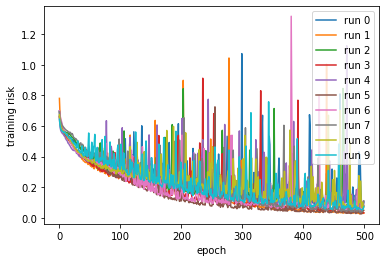

median accuracy 97.54 percent


In [11]:
better_architecture = (15, 15)

better_training_options = {
    'mini batch size': 100,
    'learning rate schedule': 'constant',
    'initial learning rate': 0.30,
    'learning rate exponent': None,
    'max epochs': 500,
    'momentum': 0.25,
    'verbose': False
}

experiment(better_architecture, better_training_options, data_sets,
           runs=10, plot_predictions=False)

Here's a summary of the changes we've made to the parameter set:

1.	mini-batch size: Our input data are fairly grouped together (large circles rather than noisy red and green splotches), so this was primarily an optimization to improve compute time since we can build larger groups to summarize a subset of data while still retaining accuracy. In fact, having a large mini-batch size when the target space (the green area) is grouped is ideal as it is both a performance optimization and a method to prevent overfitting.

2.	Initial Learning Rate: this was changed to make moving to the optimum quicker in the first few epochs, thereby decreasing the number of epochs necessary to get tangible results. Mostly a performance improvement.

3.	Max epochs: decreased because we were able to get sufficiently accurate matches without resorting to more time-intensive max-epoch sizes.

4.	Momentum: Similar to initial learning rate, this was done to optimize learning early on and quicken the run's time to asymptotic accuracy of 100%. This was also important as there could be "plateaus" in the monotonous areas (i.e. not the boundaries between green and red) that would otherwise stunt the progress of the learning process.

5.	Architecture: By far the most important optimization to improve accuracy, increasing the number of layers and nodes per layer in the network will naturally increase the number of possible weights the neural network can optimize to fit the training data. However, as we increase the number of nodes and layers to such high numbers, it is very possible that this model will be overfit to the training data. This isn't a concern here though, so while overfitting is likely happening here, it's not a huge issue for this problem. 